<div>
<a href="https://www.audiolabs-erlangen.de/fau/professor/mueller"><img src="data_layout/PCP_Teaser.png" width=100% style="float: right;" alt="PCP Teaser"></a>
</div>

# Unit 8: Signals and Sampling

<ul>
    <li><a href='#learn'>Overview and Learning Objectives</a></li>     
    <li><a href='#signal'>Signals</a></li>    
    <li><a href='#sampling'>Sampling</a></li>
    <li><a href='#aliasing'>Aliasing</a></li>     
    <li><a href='#interference'>Interference</a></li>    
    <li><a href='#exercise_beating'>Exercise 1: Beating</a></li>   
    <li><a href='#exercise_aliasing_sinus'>Exercise 2: Aliasing with Sinsuoids</a></li>      
    <li><a href='#exercise_aliasing_visual'>Exercise 3: Visual Aliasing</a></li>
</ul> 

<a id='learn'></a> 
<div class="alert alert-block alert-warning">
<h2>Overview and Learning Objectives</h2>

In technical fields such as engineering or computer science, a <strong>signal</strong> may be defined as a function that conveys information about the state or behavior of a physical system. For example, a signal may describe the time-varying sound pressure at some place, the motion of a particle through some space, the distribution of light on a screen representing an image, or the sequence of images as in the case of a video signal. In this unit, we consider the case of sound or audio signals, which may be represented graphically by a plot that shows the relative air pressure (with respect to a reference air pressure) over time. In some way, a sinusoid of a given frequency may be thought of as a prototype of an audio signal. We start this unit by formally defining a signal as a mathematical function. Interleaving theory with practice, we then provide a Python function to generate a sinusoid with different parameters (duration, amplitude, frequency, phase, sampling rate), which you can look at via a plot and listen to via audio playback. To digitally compute with signals, one typically needs to convert a signal given on a continuous-time axis into one given on a discrete-time axis&mdash;a process commonly referred to as <strong>sampling</strong>. While providing a Python function that performs some equidistant sampling, we also discuss the kind of information that may be lost in the sampling process. This leads us to topics related to <strong>aliasing</strong> and the <strong>sampling theorem</strong>. Finally, using sinusoidal signals as an example, we cover the phenomena of constructive and destructive <strong>interference</strong>. In the exercises, we further deepen these aspects by studying the phenomenon known as <strong>beating</strong> and by looking at further examples illustrating aliasing. We assume that you are familiar with these fundamental concepts that are typically taught in an introductory signal processing course. Besides reviewing these concepts, another main learning objective of this unit is to show you how to generate and use multimedia objects (e.g., audio, image, and video objects) within the Jupyter notebook framework. In particular, in fields such as multimedia engineering, the interaction with concrete multimedia objects (e.g., sound examples) will help you move from recalling and reciting theoretical concepts towards comprehension and application. Following similar educational considerations, you may find additional material in the <a href="https://www.audiolabs-erlangen.de/FMP">FMP Notebooks</a> for teaching and learning fundamentals of music processing. In particular, the <a href="https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2S2_DigitalSignalSampling.html">FMP Notebook on Sampling</a> and the <a href="https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2S3_InterferenceBeating.html">FMP Notebook on Interference and Beating</a> have served as basis for this unit. 
    
</div>

<a id='signal'></a> 
## Signals

A **sound** is generated by a vibrating object such as the vocal cords of a singer, the string and soundboard of a violin, or the diaphragm of a kettledrum. In signal processing, such a sound is typically represented by a function or **signal** $f\colon\mathbb{R}\to\mathbb{R}$, which encodes the sound's air pressure changes over time. The signal is called **periodic** if its values repeat at regular intervals. Intuitively speaking, the **period** of the signal is defined as the time required to complete a cycle. The **frequency**, measured in **Hertz** (Hz), is the reciprocal of the period. The prototype of such a periodic signal is a **sinusoid**, which is specified by its **frequency**, its **amplitude** (the peak deviation of the sinusoid from its mean), and its **phase** (determining where in its cycle the sinusoid is at time zero). In the following code cell, we provide a function for generating a sinusoid. 

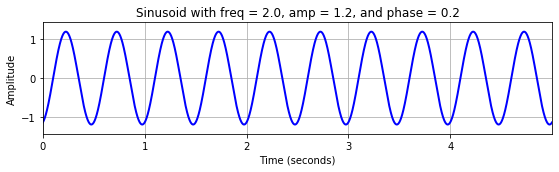

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def generate_sinusoid(dur=1, amp=1, freq=1, phase=0, Fs=100):
    """Generation of sinusoid

    Notebook: PCP_08_signal.ipynb

    Args:
        dur: Duration (in seconds) of sinusoid (Default value = 1)
        amp: Amplitude of sinusoid (Default value = 1)
        freq: Frequency (in Hertz) of sinusoid (Default value = 1)
        phase: Phase (relative to interval [0,1)) of sinusoid (Default value = 0)
        Fs: Sampling rate (in samples per second) (Default value = 100)

    Returns:
        x: Signal
        t: Time axis (in seconds)
    """
    num_samples = int(Fs * dur)
    t = np.arange(num_samples) / Fs
    x = amp * np.sin(2 * np.pi * (freq * t - phase))
    return x, t

amp = 1.2
freq = 2
phase = 0.2
x, t = generate_sinusoid(dur=5, amp=amp, freq=freq, phase=phase, Fs=1000)

plt.figure(figsize=(8, 2.5))
plt.plot(t, x, color='blue', linewidth=2.0, linestyle='-')
plt.xlim([0, t[-1]])
plt.ylim([-amp*1.2, amp*1.2])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Sinusoid with freq = %.1f, amp = %.1f, and phase = %.1f' % (freq, amp, phase))
plt.grid()
plt.tight_layout()

Interpreted as audio signal, one may listen to the sound of a sinusoid as long as its frequency lies in the human hearing range (roughly between $20$ and $20,000~\mathrm{Hz}$). To integrate an audio signal into a Jupyter notebook, we can use the module [`IPython.display`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html), which is an application programming interface (API) for displaying various tools in IPython. As for audio, one can use the class [`IPython.display.Audio`](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html),  which creates an in-browser audio player. In the following code cell, this functionality is demonstrated using a sinusoid of $440~\mathrm{Hz}$.

In [2]:
import IPython.display as ipd

Fs = 4000
dur = 1
x, t = generate_sinusoid(dur=dur, amp=1, freq=440, Fs=Fs)

ipd.display(ipd.Audio(x, rate=Fs))

<a id='sampling'></a> 
## Sampling

In digital signal processing, one often reduces a **continuous-time** (CT) signal $f\colon\mathbb{R}\to\mathbb{R}$ into a **discrete-time** (DT) signal $x\colon\mathbb{Z}\to\mathbb{R}$ by a procedure known as **equidistant sampling**. Fixing a positive real number $T>0$, the DT-signal $x$ is obtained by setting 

\begin{equation}
   x(n):= f(n \cdot T)
\end{equation}

for $n\in\mathbb{Z}$. The value $x(n)$ is called the **sample** taken at time $t=n\cdot T$ of the original analog signal $f$. In short, this procedure is also called **$T$-sampling**. The number $T$ is referred to as the **sampling period** and the inverse $F_\mathrm{s}:=1/T$ as the **sampling rate**. The sampling rate specifies the number of samples per second and is measured in Hertz (Hz). 

In the following code cell, we start with a CT-signal $f$ that is defined via linear interpolation of a DT-signal sampled at a high sampling rate (generated by the `generate_example_function`). In the plot, this CT-signal is visualized as black curve. Applying equidistant sampling (`sampling_equidistant`), we obtain the DT-signal visualized as the red stem plot.

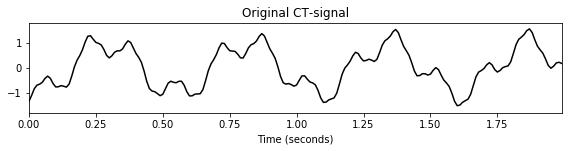

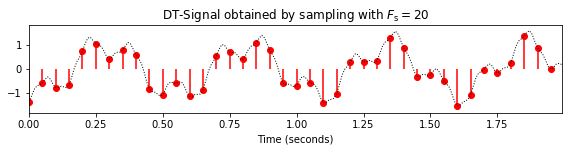

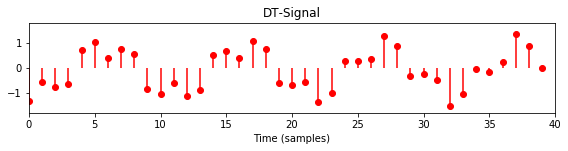

In [3]:
def generate_example_signal(dur=1, Fs=100):
    """Generate example signal

    Notebook: PCP_08_signal.ipynb

    Args:
        dur: Duration (in seconds) of signal (Default value = 1)
        Fs: Sampling rate (in samples per second) (Default value = 100)

    Returns:
        x: Signal
        t: Time axis (in seconds)
    """
    N = int(Fs * dur)
    t = np.arange(N) / Fs
    x = 1 * np.sin(2 * np.pi * (1.9 * t - 0.3))
    x += 0.5 * np.sin(2 * np.pi * (6.1 * t - 0.1))
    x += 0.1 * np.sin(2 * np.pi * (20 * t - 0.2))
    return x, t

def sampling_equidistant(x_1, t_1, Fs_2, dur=None):
    """Equidistant sampling of interpolated signal

    Notebook: PCP_08_signal.ipynb

    Args:
        x_1: Signal to be interpolated and sampled
        t_1: Time axis (in seconds) of x_1
        Fs_2: Sampling rate used for equidistant sampling
        dur: Duration (in seconds) of sampled signal (Default value = None)

    Returns:
        x_2: Sampled signal
        t_2: time axis (in seconds) of sampled signal
    """
    if dur is None:
        dur = len(t_1) * t_1[1]
    N = int(Fs_2 * dur)
    t_2 = np.arange(N) / Fs_2
    x_2 = np.interp(t_2, t_1, x_1)
    return x_2, t_2
    
Fs_1 = 100
x_1, t_1 = generate_example_signal(Fs=Fs_1, dur=2)

Fs_2 = 20
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
    
plt.figure(figsize=(8, 2.2))
plt.plot(t_1, x_1, 'k')
plt.title('Original CT-signal')
plt.xlabel('Time (seconds)')
plt.ylim([-1.8, 1.8])
plt.xlim([t_1[0], t_1[-1]])
plt.tight_layout()

plt.figure(figsize=(8, 2.2))
plt.stem(t_2, x_2, linefmt='r', markerfmt='ro', basefmt='None', use_line_collection=True)
plt.plot(t_1, x_1, 'k', linewidth=1, linestyle='dotted')
plt.title(r'DT-Signal obtained by sampling with $F_\mathrm{s} = %.0f$' % Fs_2)
plt.xlabel('Time (seconds)')
plt.ylim([-1.8, 1.8])
plt.xlim([t_1[0], t_1[-1]])
plt.tight_layout()

plt.figure(figsize=(8, 2.2))
plt.stem(x_2, linefmt='r', markerfmt='ro', basefmt='None', use_line_collection=True)
plt.title(r'DT-Signal')
plt.xlabel('Time (samples)')
plt.ylim([-1.8, 1.8])
plt.xlim([0, len(t_2)])
plt.tight_layout()

<a id='aliasing'></a> 
## Aliasing

In general, sampling is a **lossy** operation in the sense that information is lost in this process and that the original CT-signal cannot be recovered from its sampled version. Only if the CT-signal has additional properties in terms of its frequency spectrum (it needs to be **bandlimited**), a perfect reconstruction is possible. This is the assertion of the famous **sampling theorem**. The sampling theorem also shows how the original CT-signal can be reconstructed by superimposing suitably shifted $\mathrm{sinc}$-functions weighted by the samples of the DT-signal.

<br>

<div class="alert alert-block alert-success">
<strong>Recap: Sampling Theorem</strong><br>
The <strong>sampling theorem</strong>, which is often associated with the names Harry Nyquist and Claude Shannon, states that a continuous-time (CT) signal that is bandlimited can be reconstructed perfectly under certain conditions. More precisely, a CT-signal $f\in L^2(\mathbb{R})$ is called <strong>$\Omega$-bandlimited</strong> if the Fourier transform $\hat{f}$ vanishes for $|\omega|>\Omega$ (i.e., $\hat{f}(\omega) = 0$ for $|\omega|>\Omega$). Let $f\in L^2(\mathbb{R})$ be an $\Omega$-bandlimited function and let $x$ be the $T$-sampled version of $f$ with $T:=1/(2\Omega)$ (i.e., $x(n)=f(nT)$, $n\in\mathbb{Z}$). Then $f$ can be reconstructed from $x$ by

$$
 f(t)=\sum_{n\in\mathbb{Z}}x(n)\mathrm{sinc}\left(\frac{t-nT}{T}\right)
 =\sum_{n\in\mathbb{Z}}f\left(\frac{n}{2\Omega}\right) \mathrm{sinc}\left(2\Omega t-n\right),
$$

where the $\mathrm{sinc}$-function is defined as

\begin{equation}
    \mathrm{sinc}(t):=\left\{\begin{array}{ll}
    \frac{\sin \pi t}{\pi t},&\mbox{ if $t\not= 0$,}\\
    1,&\mbox{ if $t= 0$.}
\end{array}\right.
\end{equation}

In other words, the CT-signal $f$ can be perfectly reconstructed from the DT-signal obtained by equidistant sampling if the bandlimit is no greater than half the sampling rate. This reconstruction based on the $\mathrm{sinc}$-function has been used in the function `reconstruction_sinc`.
</div>

Without additional properties, sampling may cause an effect known as **aliasing** where certain frequency components of the signal become indistinguishable. This effect is illustrated by the following figure. Using a high sampling rate, the original CT-signal can be reconstructed with high accuracy. However, when decreasing the sampling rate, the higher-frequency components are not captured well and only a coarse approximation of the original signal remains. This phenomenon is demonstrated by the following example.

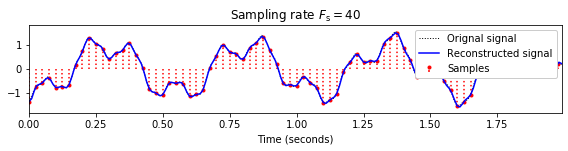

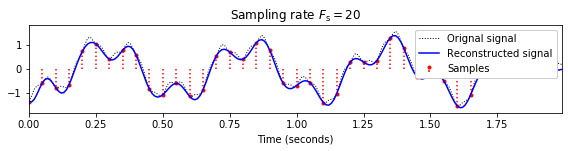

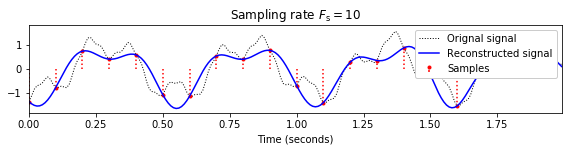

In [4]:
def reconstruction_sinc(x, t, t_sinc):
    """Reconstruction from sampled signal using sinc-functions

    Notebook: PCP_08_signal.ipynb

    Args:
        x: Sampled signal
        t: Equidistant discrete time axis (in seconds) of x
        t_sinc: Equidistant discrete time axis (in seconds) of signal to be reconstructed

    Returns:
        x_sinc: Reconstructed signal having time axis t_sinc
    """
    Fs = 1 / t[1]
    x_sinc = np.zeros(len(t_sinc))
    for n in range(0, len(t)):
        x_sinc += x[n] * np.sinc(Fs * t_sinc - n)
    return x_sinc

def plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc, figsize=(8, 2.2)):
    """Plotting three signals

    Notebook: PCP_08_signal.ipynb

    Args:
        t_1: Time axis of original signal
        x_1: Original signal
        t_2: Time axis for sampled signal
        x_2: Sampled signal
        t_sinc: Time axis for reconstructed signal
        x_sinc: Reconstructed signal
        figsize: Figure size (Default value = (8, 2.2))
    """
    plt.figure(figsize=figsize)
    plt.plot(t_1, x_1, 'k', linewidth=1, linestyle='dotted', label='Orignal signal')
    plt.stem(t_2, x_2, linefmt='r:', markerfmt='r.', basefmt='None', label='Samples', use_line_collection=True)
    plt.plot(t_sinc, x_sinc, 'b', label='Reconstructed signal')
    plt.title(r'Sampling rate $F_\mathrm{s} = %.0f$' % (1/t_2[1]))
    plt.xlabel('Time (seconds)')
    plt.ylim([-1.8, 1.8])
    plt.xlim([t_1[0], t_1[-1]])
    plt.legend(loc='upper right', framealpha=1)
    plt.tight_layout()
    plt.show()

Fs_2 = 40
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

Fs_2 = 20
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

Fs_2 = 10
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

<a id='interference'></a> 
## Interference

In signal processing, **interference** occurs when a wave is superimposed with another wave that has the same or nearly the same frequency. When a crest of one wave meets a crest of the other wave at some point, then the individual magnitudes add up for a certain period of time, which is known as **constructive interference**. Vice versa, when a crest of one wave meets a trough of the other wave, then the magnitudes cancel out for a certain period of time, which is known as **destructive interference**. We illustrate these phenomena in the following code cell. 

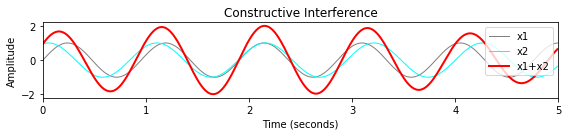

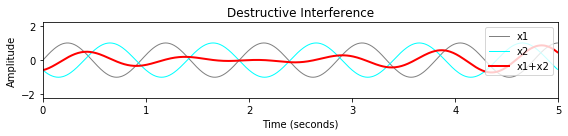

In [5]:
def plot_interference(t, x1, x2, figsize=(8, 2), xlim=None, ylim=None, title=''):
    """Plotting two signals and its superposition

    Notebook: PCP_08_signal.ipynb

    Args:
        t: Time axis
        x1: Signal 1
        x2: Signal 2
        figsize: Figure size (Default value = (8, 2))
        xlim: x-Axis limits (Default value = None)
        ylim: y-Axis limits (Default value = None)
        title: Figure title (Default value = '')
    """    
    plt.figure(figsize=(8, 2))
    plt.plot(t, x1, color='gray', linewidth=1.0, linestyle='-', label='x1')
    plt.plot(t, x2, color='cyan', linewidth=1.0, linestyle='-', label='x2')
    plt.plot(t, x1+x2, color='red', linewidth=2.0, linestyle='-', label='x1+x2')
    if xlim is None:
        plt.xlim([0, t[-1]])
    else:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

dur = 5
x1, t = generate_sinusoid(dur=dur, Fs=100, amp=1, freq=1.05, phase=0.0)
x2, t = generate_sinusoid(dur=dur, Fs=100, amp=1, freq=0.95, phase=0.8)
plot_interference(t, x1, x2, xlim=[0, dur], ylim=[-2.2,2.2], title='Constructive Interference')

dur = 5
x1, t = generate_sinusoid(dur=dur, Fs=100, amp=1, freq=1.05, phase=0.0)
x2, t = generate_sinusoid(dur=dur, Fs=100, amp=1, freq=1.00, phase=0.4)
plot_interference(t, x1, x2, xlim=[0, dur], ylim=[-2.2,2.2], title='Destructive Interference')

## Exercises and Results

In [6]:
import libpcp.signal
show_result = True

<a id='exercise_beating'></a> 
<div class="alert alert-block alert-info">
<strong>Exercise 1: Beating</strong><br>
Let $f_1(t)=\sin(2\pi \omega_1 t)$ and $f_2(t)=\sin(2\pi \omega_2 t)$ be two sinusoids with distinct but nearby frequencies $\omega_1\approx\omega_2$. The superposition $f_1+f_2$ of these two sinusoids results in a function that looks like a single sine wave with a slowly varying amplitude, a phenomenon also known as <strong>beating</strong>. Mathematically, this phenomenon results from a <strong>trigonometric identity</strong> yielding 

$$
\sin(2\pi \omega_1 t)+\sin(2\pi \omega_2 t)=
2\cos\left(2\pi\frac{\omega_1-\omega_2}{2}t\right)\sin\left(2\pi\frac{\omega_1+\omega_2}{2}t\right).
$$

If the difference $\omega_1-\omega_2$ is small, the cosine term has a low frequency compared to the sine term. As a result the signal $f_1+f_2$ can be seen as a sine wave of frequency $(\omega_1+\omega_2)/2$ with a slowly varying amplitude envelope of frequency $|\omega_1-\omega_2|$. Note that this rate is twice the frequency $(\omega_1-\omega_2)/2$ of the cosine term. 
<ul>    
<li>Use the functions <code>generate_sinusoid</code> and <code>plot_interference</code> to  illustrate the beating effect for various parameters $\omega_1$ and $\omega_2$.</li> 
<li>In particular, consider $\omega_1=200$ and $\omega_2=203$ to generate a superimposed signal <code>x</code> at a sampling rate of <code>Fs=4000</code>. Listen to <code>x</code> using <code>ipd.display(ipd.Audio(x, rate=Fs))</code>.</li>
</ul>    
</div>

In [7]:
#<solution>
# Your Solution
#</solution>

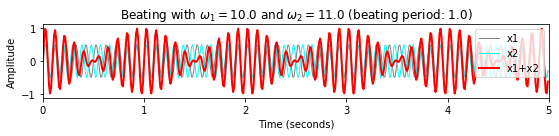

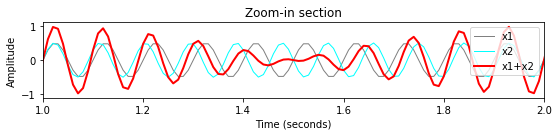

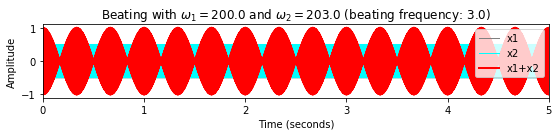

In [8]:
libpcp.signal.exercise_beating(show_result=show_result) 

<a id='exercise_aliasing_sinus'></a> 
<div class="alert alert-block alert-info">
<strong>Exercise 2: Aliasing with Sinsuoids</strong><br>
First, using <code>x, t = generate_sinusoid(dur=2, Fs=128, freq=10)</code>, generate a sinusoid of frequency $\omega=10~\mathrm{Hz}$ at <code>Fs=128</code> to mimic a CT-signal. Then, use the function <code>sampling_equidistant</code> to successively decrease the sampling rate using <code>[64, 32, 20, 16, 12, 8, 4]</code>. Visualize the result via <code>plot_signal_reconstructed</code> and discuss your observations.
</div>

In [9]:
#<solution>
# Your Solution
#</solution>

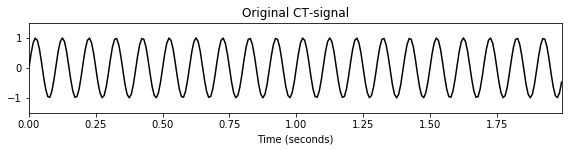

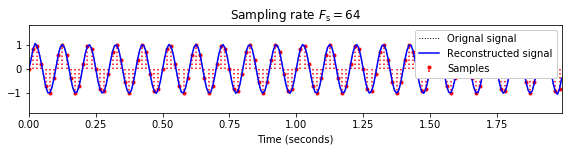

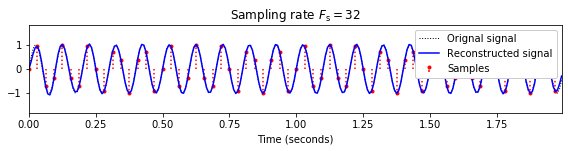

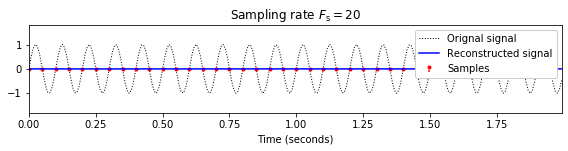

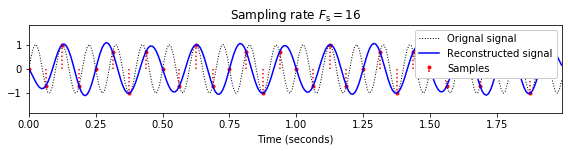

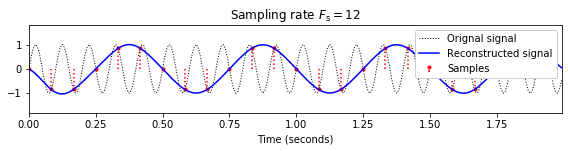

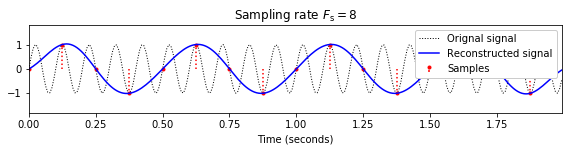

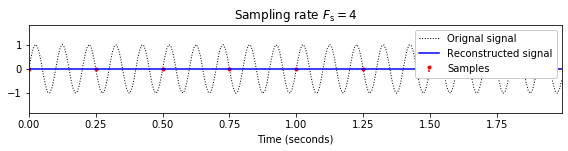

In [10]:
libpcp.signal.exercise_aliasing_sinus(show_result=show_result) 

<a id='exercise_aliasing_visual'></a> 
<div class="alert alert-block alert-info">
<strong>Exercise 3: Visual Aliasing</strong><br>
Aliasing effects occur also in other areas such as the visual domain. One famous example is the <strong>wagon-wheel effect</strong>, where a wheel appears to rotate at a slower speed or even backwards when the speed is actually increasing. Identify some YouTube videos that illustrate this effect. Furthermore, integrate the video into your notebooks. To this end, do the following:
<ul>
<li> Import the <a href='https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html'>API for display tools in IPython</a>: <code>import IPython.display as ipd</code>.  </li>
<li> Use the following commands: <code>ipd.display</code>, <code>ipd.YouTubeVideo</code></li>    
</ul>
</div>

In [11]:
#<solution>
# Your Solution
#</solution>

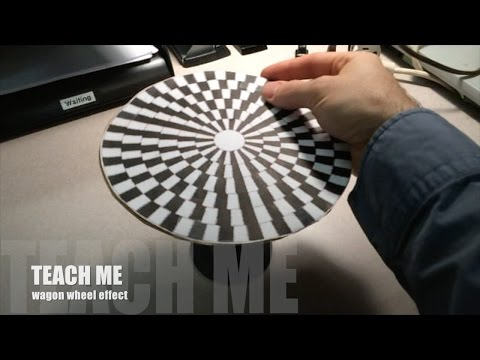

In [12]:
libpcp.signal.exercise_aliasing_visual(show_result=show_result) 

<div>
<a href="https://opensource.org/licenses/MIT"><img src="data_layout/PCP_License.png" width=100% style="float: right;" alt="PCP License"></a>
</div>